In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from cryocat import cryomotl
from cryocat import geom
from cryocat import visplot
from cryocat import nnana as nn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
from matplotlib import rc
import matplotlib as mtl

In [3]:
mtl.rcParams['font.sans-serif'] = "Arial"
mtl.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'
sns.set_palette('colorblind')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#motl_ribo2: ribosome center
#Expected run time for demo on a "normal" desktop computer: less than 30 minutes. 
motl_tric = cryomotl.Motl.load('../wtj155oprun_datarmh1.em')
motl_ribo2 = cryomotl.Motl.load('../wtj056ribo_b2_rm-ccrt17.em')
pixel_size = 0.2446

In [7]:
stats_ribo2 = nn.get_nn_stats(motl_ribo2, motl_tric, pixel_size = pixel_size)

In [8]:
df2 = stats_ribo2
#Grouping by 'subtomo_nn_idx' and finding the row with the smallest distance
stats_ribo2min = df2.loc[df2.groupby('subtomo_nn_idx')['distance'].idxmin()]

In [9]:
stats_ribo2min70 = stats_ribo2min[stats_ribo2min['distance'] < 70]

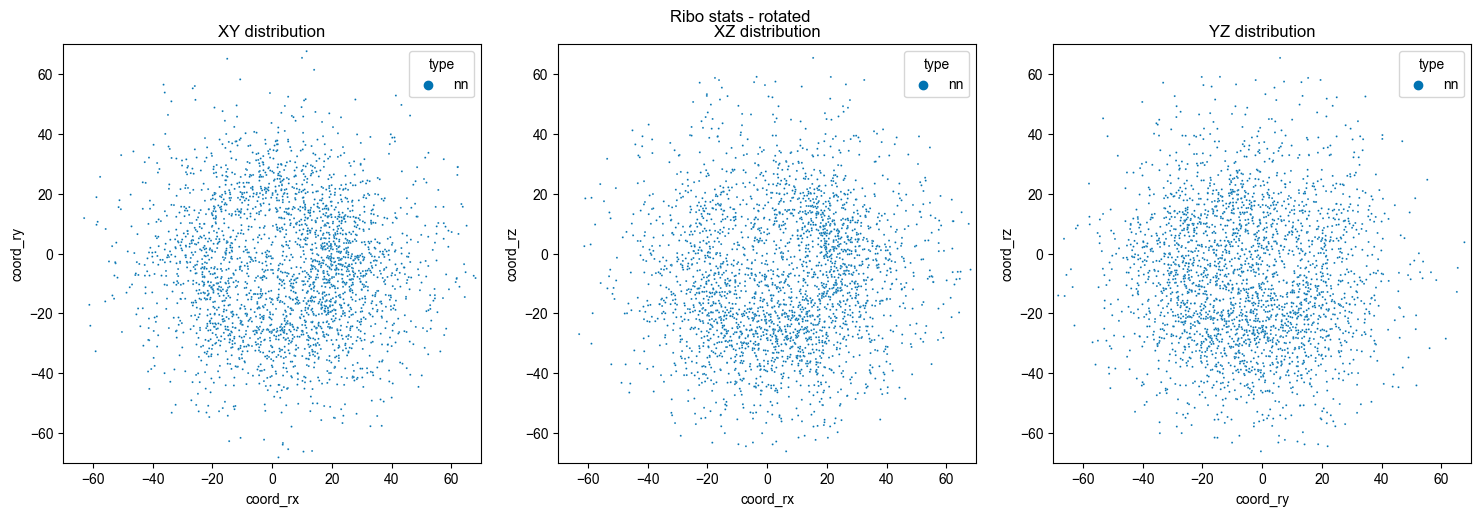

In [9]:
nn.plot_nn_rot_coord_df(stats_ribo2min70, displ_threshold=70, marker_size=2, title = 'Ribo stats - rotated', output_name = 'wtribocen_tricop-70nm.svg')